In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm, preprocessing

In [96]:
data = pd.read_csv("/kaggle/input/black-friday-sale/train.csv")

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<AxesSubplot:>

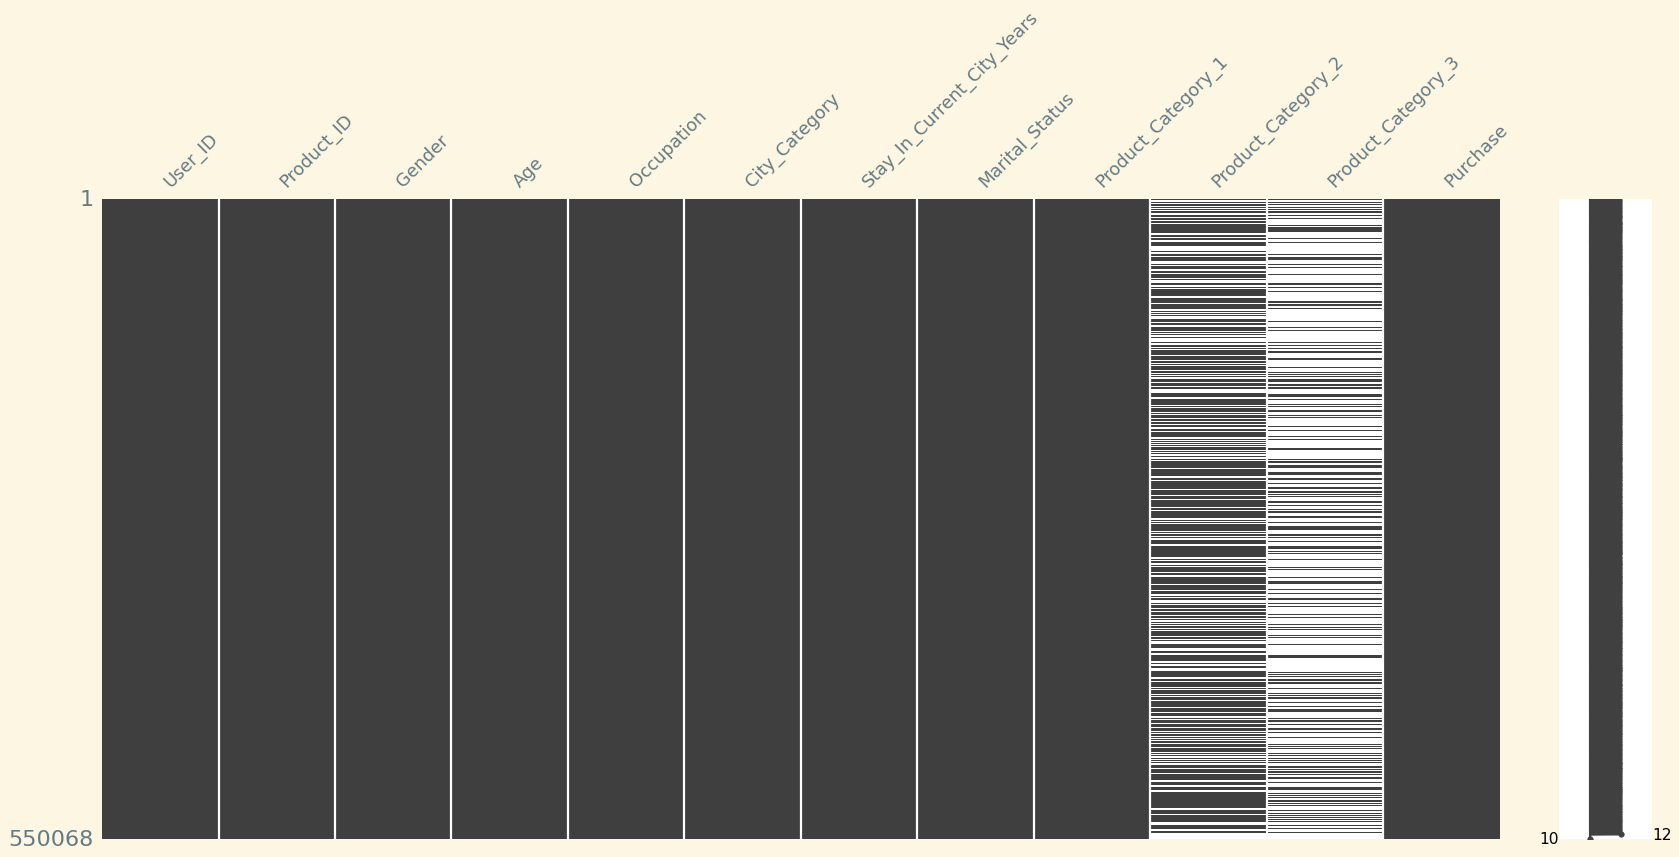

In [98]:
import missingno as msno     #to check is there any missing values
                             # there is some missing values in product category
msno.matrix(data)


In [99]:
df = data.copy()
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Purchase Distribution****

<AxesSubplot:title={'center':'Purchase Distribution'}, ylabel='Frequency'>

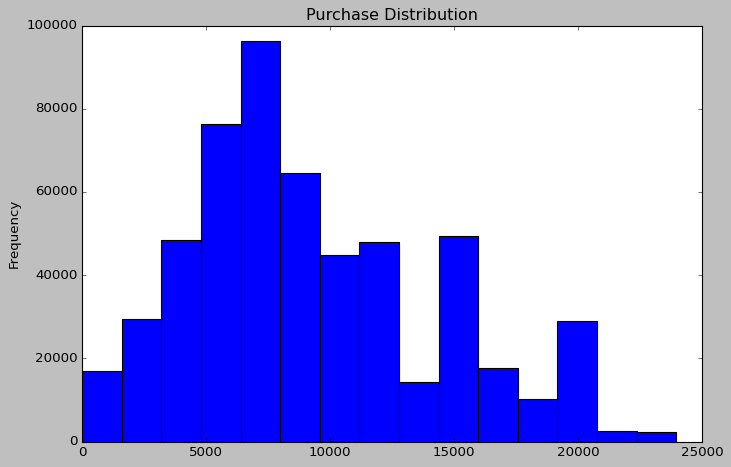

In [101]:
plt.style.use('classic')
purchase_d=df['Purchase']
purchase_d.plot(kind='hist',bins=15,
     edgecolor = 'black',figsize=(10,6.5),title ='Purchase Distribution')

In [102]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Analysis by Gender****

array([<AxesSubplot:ylabel='User_ID'>], dtype=object)

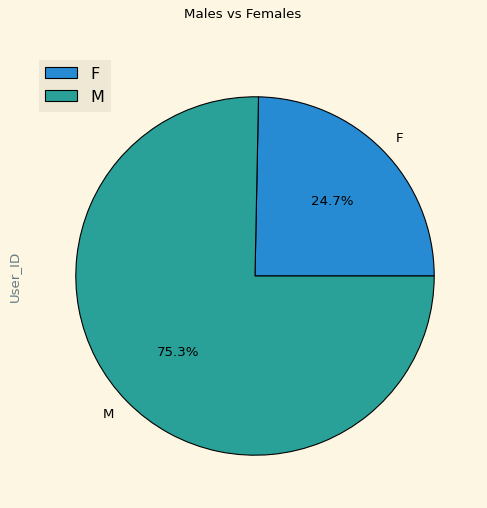

In [103]:
gender_count=df[['Gender','User_ID']].groupby('Gender').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Males vs Females',figsize=(12,7))

# Mals vs Female by Purchases

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

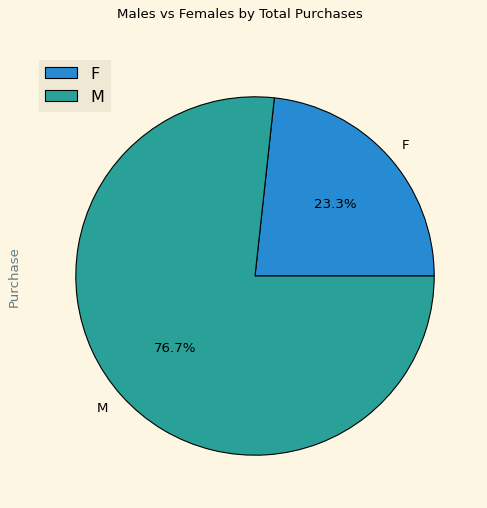

In [104]:
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()
gender_pu
gender_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Males vs Females by Total Purchases')

# Analysis by Marital_Status****

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

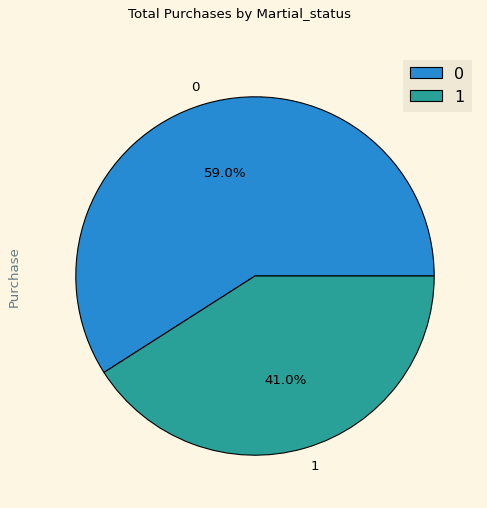

In [105]:
status_pu=df[['Marital_Status','Purchase']].groupby('Marital_Status').sum()
status_pu
status_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Total Purchases by Martial_status')

# Occupation status count

<AxesSubplot:title={'center':'Occupation count'}, xlabel='Occupation'>

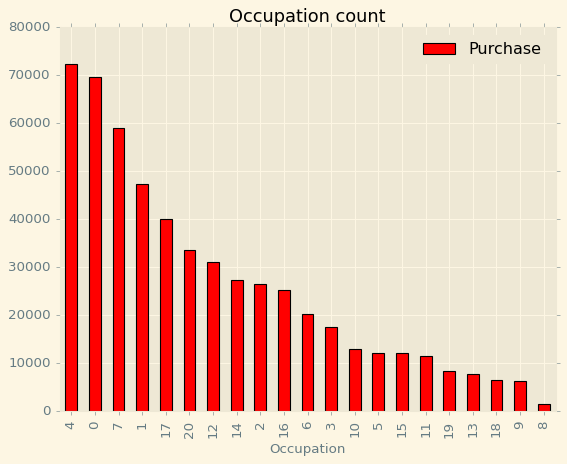

In [106]:
ocu_count=df[['Occupation','Purchase']].groupby('Occupation').count()
ocu_count=ocu_count.sort_values(by='Purchase',ascending=False)
ocu_count.plot(kind='bar', color='red',title='Occupation count')

# Purchases by occupation

<AxesSubplot:title={'center':'Total Purchases by Occupation'}, xlabel='Occupation'>

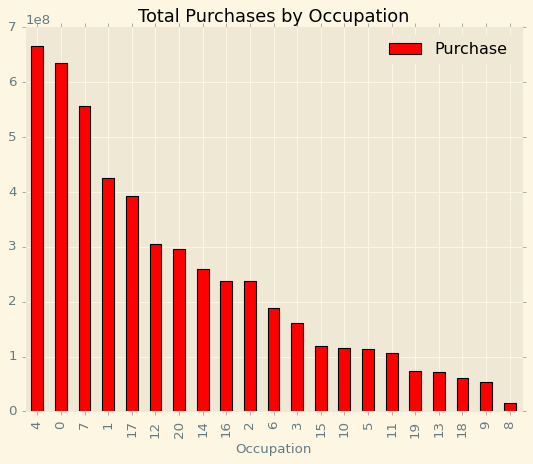

In [107]:
occupation_pu=df[['Occupation','Purchase']].groupby('Occupation').sum()
occupation_pu=occupation_pu.sort_values(by='Purchase',ascending=False)
occupation_pu.plot(kind='bar',color='red',title='Total Purchases by Occupation')

array([<AxesSubplot:title={'center':'Purchase'}, xlabel='City_Category'>],
      dtype=object)

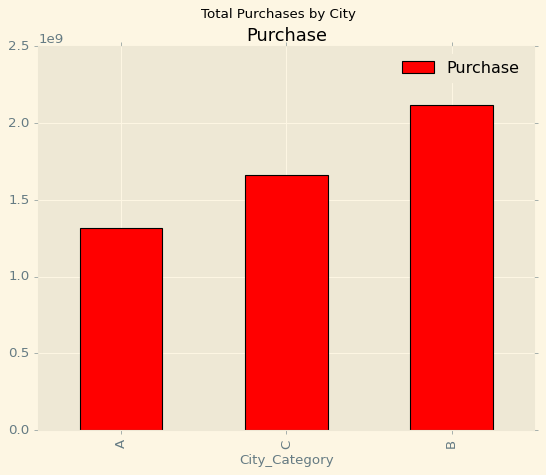

In [108]:
city_purchase=df[['City_Category','Purchase']].groupby('City_Category').sum()
city_purchase=city_purchase.sort_values(by='Purchase')
city_purchase.plot(kind='bar', color='red',subplots=True,title='Total Purchases by City')

# Total Purchases by city

<AxesSubplot:ylabel='Age'>

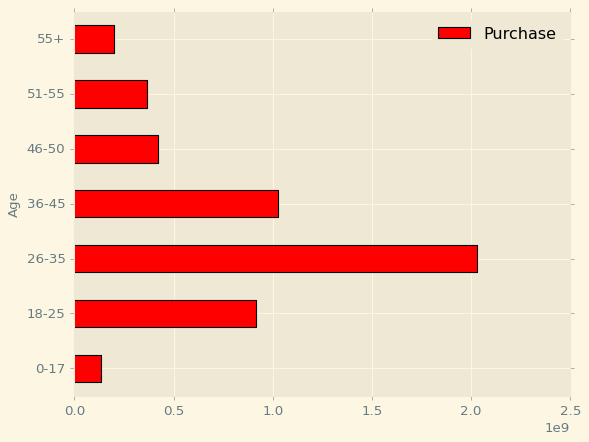

In [109]:
age_purchase=df[['Age','Purchase']].groupby('Age').sum()
age_purchase.plot(kind='barh',color='red')

# **Product Category Analysis**

<AxesSubplot:title={'center':'Product Category 1 by purchases'}, ylabel='Product_Category_1'>

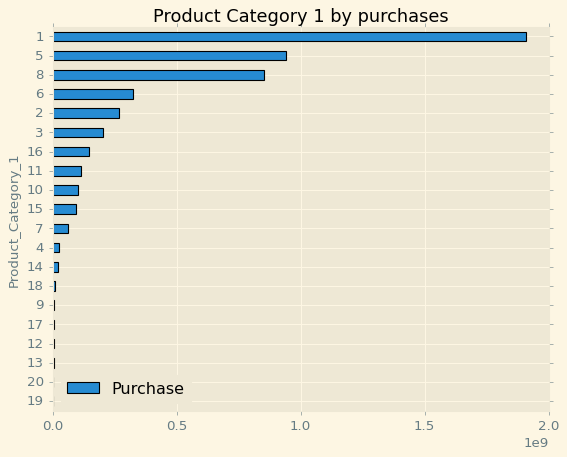

In [110]:
prod_pu1=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod_pu1=prod_pu1.sort_values(by='Purchase')
prod_pu1.plot(kind='barh',title='Product Category 1 by purchases')

<AxesSubplot:title={'center':'Product Category 2 by purchases'}, ylabel='Product_Category_2'>

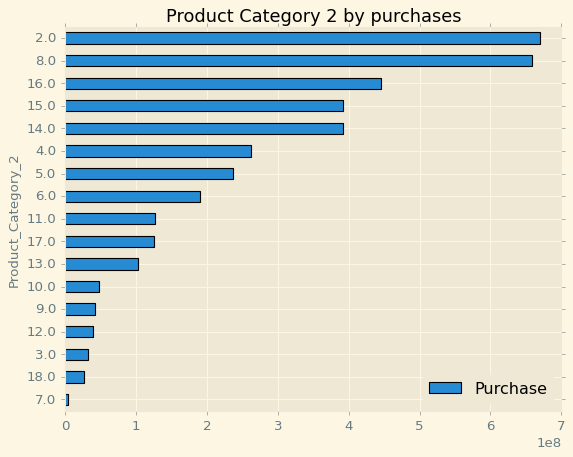

In [111]:
prod_pu2=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod_pu2=prod_pu2.sort_values(by='Purchase')
prod_pu2.plot(kind='barh',title='Product Category 2 by purchases')

<AxesSubplot:title={'center':'Product Category 3 by purchases'}, ylabel='Product_Category_3'>

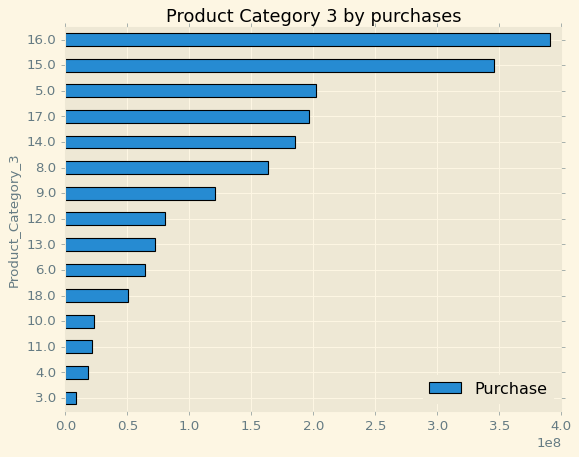

In [112]:
prod_pu3=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod_pu3=prod_pu3.sort_values(by='Purchase')
prod_pu3.plot(kind='barh',title='Product Category 3 by purchases')

# Top 5 Product by Purchase****

array([<AxesSubplot:>], dtype=object)

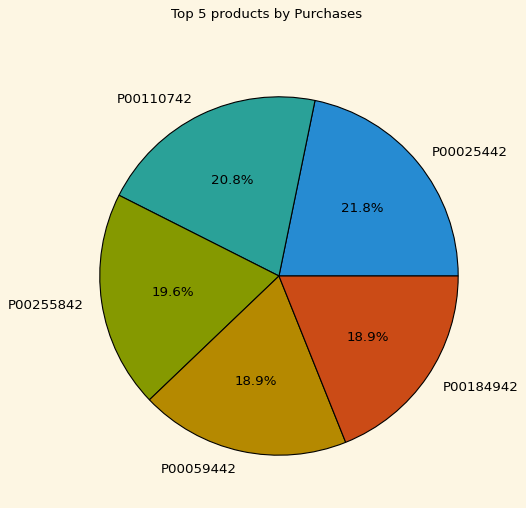

In [113]:
top_prod=df[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='Top 5 products by Purchases',subplots=True,autopct='%1.1f%%',
              legend=False,ylabel='',figsize=(12,7))

# Customers purchases by their years in the city

<AxesSubplot:title={'center':'Customers purchases by their years in the city'}, xlabel='Years', ylabel='Years'>

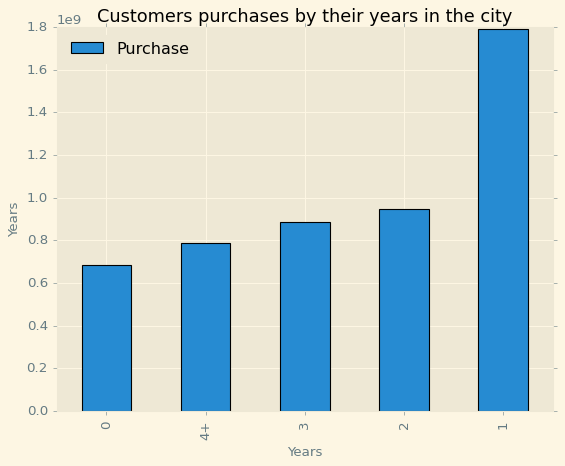

In [114]:
city_dur=df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').sum()
city_dur=city_dur.sort_values(by='Purchase')
city_dur.plot(kind='bar',xlabel='Years',ylabel='Years',title='Customers purchases by their years in the city')

# Data correlation:

In [115]:
df2=df.copy()

In [116]:
df2['Gender']=pd.factorize(df2.Gender)[0]
df2['Age']=pd.factorize(df2.Age)[0]
df2['City_Category']=pd.factorize(df2.City_Category)[0]
df2['Stay_In_Current_City_Years']=pd.factorize(df2.Stay_In_Current_City_Years)[0]
df2['Product_ID']=pd.factorize(df2.Product_ID)[0]
df2['User_ID']=pd.factorize(df2.User_ID)[0]

In [117]:
df2['Product_Category_1']=pd.factorize(df2.Product_Category_1)[0]
df2['Product_Category_2']=pd.factorize(df2.Product_Category_2)[0]
df2['Product_Category_3']=pd.factorize(df2.Product_Category_3)[0]

In [118]:
df2.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.004389,-0.038275,-0.039948,-0.023348,0.023497,0.003509,0.025181,0.010296,0.002447,0.000739,0.006735
Product_ID,0.004389,1.000000,-0.016938,-0.006908,-0.004188,-0.013383,0.007775,0.013193,0.286762,-0.077515,-0.173713,-0.249081
Gender,-0.038275,-0.016938,1.000000,-0.000777,0.117291,-0.007688,-0.015108,-0.011603,-0.006406,0.021938,0.037288,0.060346
Age,-0.039948,-0.006908,-0.000777,1.000000,-0.040858,0.042006,0.007013,-0.078776,-0.006687,0.004906,0.008081,0.002344
Occupation,-0.023348,-0.004188,0.117291,-0.040858,1.000000,0.005470,-0.010470,0.024280,0.003964,0.008461,0.008824,0.020833
City_Category,0.023497,-0.013383,-0.007688,0.042006,0.005470,1.000000,-0.011205,0.016846,-0.006594,0.011255,0.011226,0.011513
Stay_In_Current_City_Years,0.003509,0.007775,-0.015108,0.007013,-0.010470,-0.011205,1.000000,0.010461,0.003440,-0.001197,-0.004844,-0.007504
Marital_Status,0.025181,0.013193,-0.011603,-0.078776,0.024280,0.016846,0.010461,1.000000,0.011935,-0.002574,-0.010064,-0.000463
Product_Category_1,0.010296,0.286762,-0.006406,-0.006687,0.003964,-0.006594,0.003440,0.011935,1.000000,-0.108763,-0.217742,-0.130190
Product_Category_2,0.002447,-0.077515,0.021938,0.004906,0.008461,0.011255,-0.001197,-0.002574,-0.108763,1.000000,0.238617,0.129176


<AxesSubplot:>

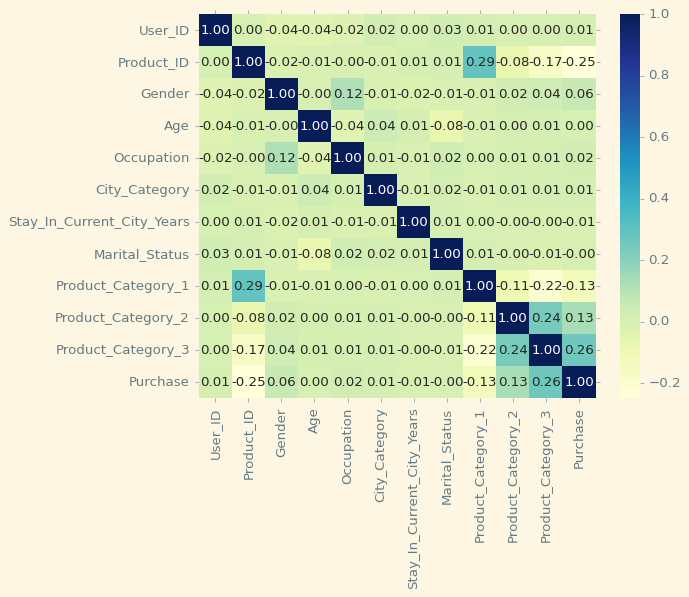

In [119]:
sns.heatmap(df2.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')